In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [3]:
#importer notre data_sets emplacement 
data_train_path = 'Fruits_Vegetables/Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/Fruits_Vegetables/validation'

In [4]:
img_width = 180
img_height =180 

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [6]:
data_cat = data_train.class_names

In [7]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [8]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


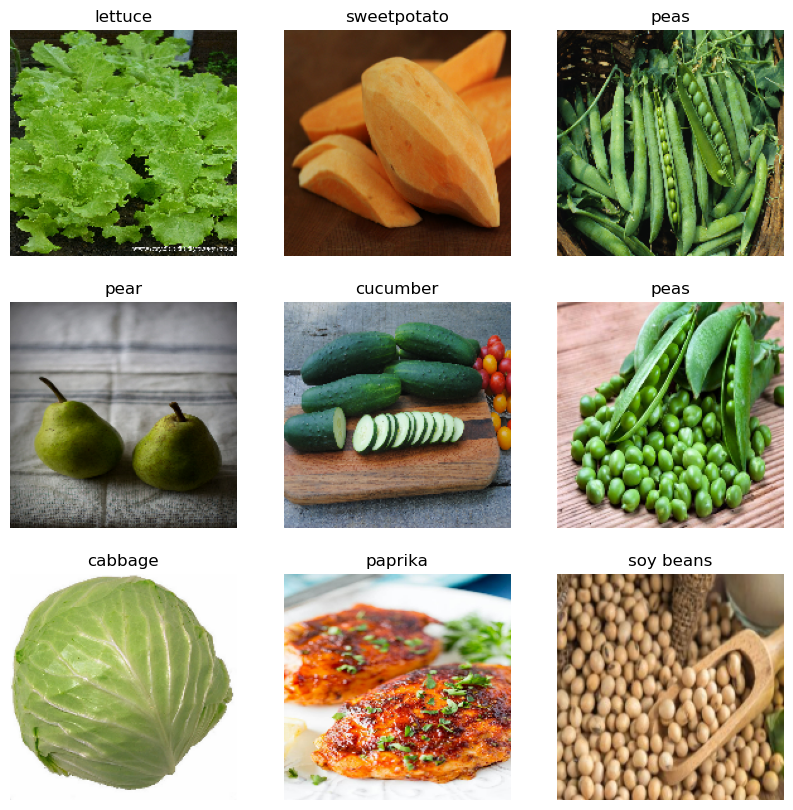

In [10]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [11]:
from tensorflow.keras.models import Sequential

In [15]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),#normaliser les valeurs des pixels
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),#conserver 
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),#applatiser les doneesen une seule dimension por passer dans la couche dense suivant
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))#utilise une l'activation par defautet produira les sorties finale du modele 
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [19]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.9480 - loss: 0.2135 - val_accuracy: 0.9316 - val_loss: 0.4994
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.9543 - loss: 0.1924 - val_accuracy: 0.9516 - val_loss: 0.3715
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.9603 - loss: 0.1758 - val_accuracy: 0.9516 - val_loss: 0.3556
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 101s 966ms/step - accuracy: 0.9623 - loss: 0.1479 - val_accuracy: 0.9601 - val_loss: 0.2993
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 97s 914ms/step - accuracy: 0.9848 - loss: 0.1007 - val_accuracy: 0.9573 - val_loss: 0.3203
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 98s 939ms/step - accuracy: 0.9858 - loss: 0.0934 - val_accuracy: 0.9573 - val_loss: 0.3133
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 99s 959ms/step - accuracy: 0.9851 - loss: 0.0799 - val_accuracy: 0.9544 - val_loss: 0.2823
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.9842 - loss: 0.0738 - val_accuracy: 0

In [1]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

NameError: name 'epochs_size' is not defined

In [26]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [27]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [28]:
score = tf.nn.softmax(predict)

In [29]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 83.26


In [1]:
model.save('Image_classify.keras')

NameError: name 'model' is not defined